In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)  # print out all the columns of data frames up to 50 columns.

In [6]:
df = pd.read_csv('data/TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,42.972000,44.066002,42.192001,43.397999,43.397999,29616500
1,2017-01-04,42.950001,45.599998,42.862000,45.397999,45.397999,56067500
2,2017-01-05,45.284000,45.495998,44.389999,45.349998,45.349998,29558500
3,2017-01-06,45.386002,46.062000,45.090000,45.801998,45.801998,27639500
4,2017-01-09,45.793999,46.383999,45.599998,46.256001,46.256001,19897500


In [7]:
len(df)

1060

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,42.972000,44.066002,42.192001,43.397999,43.397999,29616500
1,2017-01-04,42.950001,45.599998,42.862000,45.397999,45.397999,56067500
2,2017-01-05,45.284000,45.495998,44.389999,45.349998,45.349998,29558500
3,2017-01-06,45.386002,46.062000,45.090000,45.801998,45.801998,27639500
4,2017-01-09,45.793999,46.383999,45.599998,46.256001,46.256001,19897500
...,...,...,...,...,...,...,...
1055,2021-03-15,694.090027,713.179993,684.039978,707.940002,707.940002,29335600
1056,2021-03-16,703.349976,707.919983,671.000000,676.880005,676.880005,31903400
1057,2021-03-17,656.869995,703.729980,651.010010,701.809998,701.809998,40083300
1058,2021-03-18,684.289978,689.229980,652.000000,653.159973,653.159973,33224800


In [9]:
import matplotlib.pyplot as plt

In [10]:
plt.rcParams['figure.figsize'] = (8.0, 6.0) #setting figure size

In [11]:
import seaborn as sns

sns.set_style('whitegrid')

<AxesSubplot:xlabel='Date', ylabel='Open'>

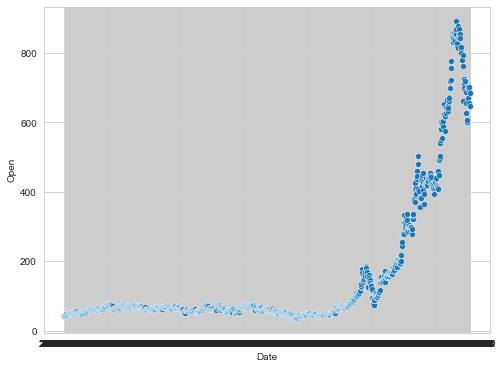

In [12]:
sns.scatterplot(data=df, x='Date', y='Open')

In [13]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999596,0.999449,0.999002,0.999002,0.065048
High,0.999596,1.000000,0.999321,0.999585,0.999585,0.073549
Low,0.999449,0.999321,1.000000,0.999429,0.999429,0.056812
Close,0.999002,0.999585,0.999429,1.000000,1.000000,0.066966
Adj Close,0.999002,0.999585,0.999429,1.000000,1.000000,0.066966
Volume,0.065048,0.073549,0.056812,0.066966,0.066966,1.000000


<AxesSubplot:>

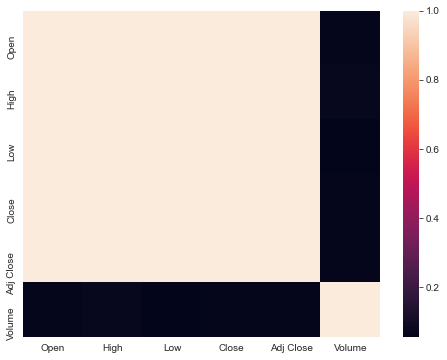

In [14]:
sns.heatmap(df.corr())

In [15]:
import statsmodels.formula.api as smf

In [16]:
model = smf.ols(data = df, formula = "y ~ x")

PatsyError: Error evaluating factor: NameError: name 'x' is not defined
    y ~ x
        ^

In [17]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

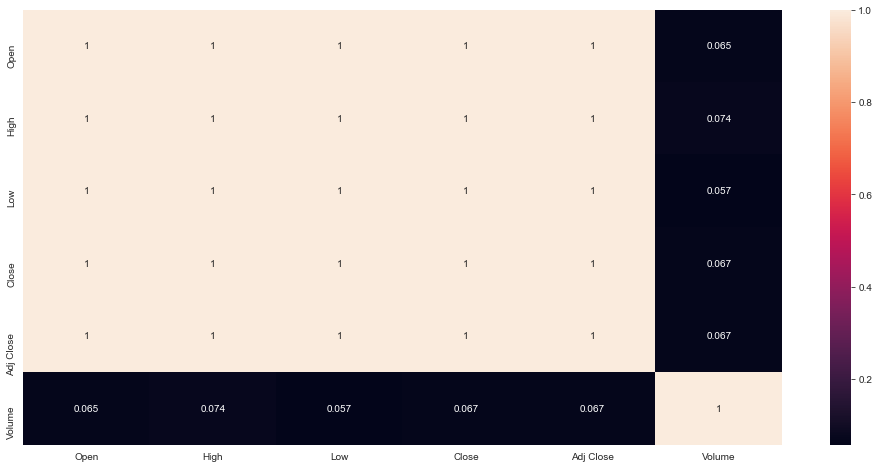

In [18]:
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(df.corr(), annot = True)

In [19]:
x = df.loc[:,'High':'Turnover (Lacs)']
y = df.loc[:,'Open']

KeyError: 'Turnover (Lacs)'

In [21]:
x = df.loc[:,'High']
y = df.loc[:,'Open']

In [22]:


y.head()



0    42.972000
1    42.950001
2    45.284000
3    45.386002
4    45.793999
Name: Open, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 0)


In [25]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [26]:


LR.fit(x_train,y_train)



ValueError: Expected 2D array, got 1D array instead:
array=[ 60.580002  53.931999 694.880005  61.900002 423.       305.481995
  65.353996  48.796001  64.199997  71.       717.849976 156.701996
  67.980003  69.442001 799.840027 404.39801  193.798004 431.799988
 161.009995 425.799988  63.709999 105.160004  47.792     46.400002
  70.300003  73.736     45.495998  67.491997 654.320007  39.995998
 627.75      62.063999 293.       114.772003  64.421997 420.089996
  49.486     67.772003  61.299999  64.150002 200.175995  66.786003
  71.956001  65.050003 159.279999  63.757999  49.742001  46.487999
 398.98999  161.        69.442001 173.964005  61.799999  66.057999
  60.388    855.719971 842.        68.300003  44.436001  66.884003
  47.09      63.776001 217.537994 358.997986  63.220001  48.672001
  56.400002 283.451996 842.409973  47.200001  67.5       52.43
  50.216     71.265999 197.595993  96.987999  61.195999  51.442001
 109.716003  44.448002 681.400024 689.22998   47.57      46.051998
 848.        67.255997  64.195999 161.395996  57.613998 167.
  68.844002 199.768005  63.799999  54.099998  44.312    502.5
  51.014     56.689999  49.633999  56.448002  49.425999 108.592003
 166.356003  68.624001  69.402     63.164001  67.348    382.5
  46.273998  46.619999  54.976002  71.438004 437.790009  55.928001
 102.891998  69.487999 706.700012  46.200001  58.234001  74.746002
  71.723999 166.5       56.301998 179.800003  64.889999  69.653999
  70.309998  69.800003  53.214001  43.759998  84.402     57.206001
  46.751999  64.694     68.297997 151.889999 162.593994 439.
  71.75      49.633999  61.377998  61.796001  41.200001  94.370003
  59.799999  73.402     62.139999  51.150002  64.388     56.939999
  73.531998  44.234001 147.953995  73.716003 895.900024  62.939999
 571.539978 447.        75.092003  45.818001  49.672001 452.5
  70.800003  50.655998  68.709999 159.897995 138.104004  51.799999
  61.518002  63.396     69.421997 657.22998   46.5       58.894001
  73.139999 369.       878.080017  60.        59.799999  62.618
  70.349998  71.839996  75.365997  45.692001  59.712002  47.992001
 599.039978  57.299999  69.760002  45.554001  70.459999  45.995998
  70.949997 649.880005  50.200001 848.       163.998001  60.790001
  71.237999  69.120003  60.987999  71.125999  74.       702.5
  63.368     69.5       66.931999  59.        53.150002  71.332001
 666.090027  45.034    303.410004  50.883999  53.736    165.542007
  70.559998  69.956001  67.276001  63.703999  68.456001 829.880005
 368.73999  148.376007  50.970001  37.984001  60.919998  73.300003
  65.334     46.896     66.522003  63.764    121.514    821.
  85.800003  71.688004  39.        63.720001  60.599998  47.942001
  69.688004  62.694     65.400002 181.731995  56.400002  61.880001
  68.961998 439.130005 111.400002  63.25     199.       430.5
 859.5      669.900024  64.755997  50.639999  75.573997 574.
 152.399994  73.475998  67.938004  62.287998  60.799999  52.200001
  76.477997  70.236     72.547997  75.776001  67.550003  62.110001
  51.624001  65.463997  70.117996 203.194     87.061996 148.738007
 190.888     59.745998  60.976002 179.149994  52.91      69.440002
  82.599998  73.353996 113.        73.349998  73.195999  71.800003
  61.259998  65.480003  77.        49.200001  72.660004  61.192001
  64.157997  49.299999  63.726002 422.890015  68.779999 607.799988
  76.528     68.802002  63.060001  76.       428.5       64.702003
  60.202    412.450012 203.792007  56.222     59.638     50.599998
 718.719971  68.550003  71.515999  61.549999  66.045998 141.399994
 433.640015  57.838001  54.669998  69.346001 713.179993  70.195999
  68.935997 496.        65.683998  66.57     188.955994  48.841999
  61.419998  62.900002 500.140015  56.93      59.664001  70.896004
  64.648003  63.032001 451.        70.32     642.75      49.076
  46.900002  63.599998 182.399994  50.484001 168.658005 427.769989
  56.231998  63.282001  68.297997  43.330002  52.931999  65.449997
  69.164001 111.442001  60.164001 299.950012  81.370003  70.767998
  75.374001  74.382004  62.414001  47.787998  45.380001  64.012001
  73.042     55.        76.722     48.736     61.099998  45.068001
  61.478001 299.967987  61.737999  70.496002  69.809998  68.288002
  68.739998 428.        49.119999  45.790001  57.762001  52.560001
 431.75     668.5      864.77002  306.962006  73.098     63.296001
 103.330002 146.800003  74.269997  56.066002  60.888     60.537998
 436.570007  61.599998  63.646     68.800003  70.697998  64.848
  57.888    103.098     43.450001  77.921997 646.900024  64.487999
  65.098     48.796001  45.959999  61.369999 817.330017  62.498001
  61.543999  60.854    703.72998  445.230011 182.612     66.748001
  59.703999  54.967999 172.699997  68.575996  46.493999  53.066002
  58.074001  67.580002  50.436001  71.403999  63.360001 153.304001
  51.669998 146.800003  67.5       70.629997  62.900002  58.900002
  70.772003  70.297997  72.       448.890015  77.491997  45.796001
  60.986     60.919998  66.32      72.741997  59.466    598.969971
 713.609985 429.899994 432.950012  62.874001  88.400002  64.433998
  61.830002  65.199997  48.397999  42.98      44.066002  52.636002
  61.924     70.620003 428.779999  59.492001  72.099998 105.125999
  49.389999  63.099998  58.324001  68.578003  94.325996  69.959999
  61.5       65.825996  66.183998 737.210022 117.959999  95.400002
  47.153999  72.933998 202.        54.236     46.956001  62.369999
  42.200001  40.256001  46.062     65.419998  58.389999 434.589996
 154.990005 303.462006  38.452    418.600006  63.484001 651.5
  73.241997  66.251999  61.402     61.062     38.478001 312.940002
  72.099998  52.372002  60.962002  98.851997  64.896004  65.802002
  76.849998  48.93      61.354     53.936001  69.447998  68.082001
 132.600006 109.482002  66.043999 406.980011  46.139999  63.026001
 302.64801   86.139999 463.697998  68.898003  77.099998  59.001999
  72.251999  54.240002  61.425999  57.391998 425.76001   44.18
  49.689999 325.283997  52.778     70.996002  54.389999  71.139999
  70.800003  52.956001  70.073997  63.599998 448.73999   52.
  48.902    884.48999   67.961998  71.998001 130.399994  55.675999
  71.138     50.706001  59.372002  55.919998 306.34201  868.
  75.487999 721.109985  52.655998 774.        62.992001  57.84
 130.175995 418.059998  63.27      68.914001  51.321999  66.823997
  57.599998  68.889999  46.383999 201.        69.839996 154.554001
  66.       465.899994  58.736     47.959999  53.776001  49.335999
 164.949997 440.        62.307999 526.        69.199997  68.167999
  68.940002  58.5       65.234001  77.389999  46.900002 678.090027
  50.178001  51.228001  59.585999  48.        70.        68.447998
 668.450012  68.199997 157.227997 130.716003  71.519997  71.487999
  48.313999  60.647999 456.570007  69.470001  71.898003  51.147999
  54.958    696.599976 103.134003  63.259998  57.032001  69.655998
  65.393997 428.079987  72.638    133.600006  62.925999  60.116001
  64.306    384.779999 309.783997  64.860001  46.299999  64.769997
  44.644001 627.840027 172.       163.600006 651.280029  90.400002
  59.931999  55.290001  59.560001  61.689999  65.426003  69.681999
  62.598     63.627998 740.840027  65.424004  71.998001  84.258003
  57.478001  75.601997  69.078003 318.       719.        75.592003
  71.517998  58.298     72.956001 115.036003 433.929993 502.48999
 146.145996  69.709999  66.330002  53.102001 284.        63.448002
 435.399994  71.047997 900.400024 116.400002 419.097992 118.900002
  61.653999  47.188     56.279999  65.099998  50.014     61.776001
  55.936001 877.77002   71.244003  60.174     98.973999  61.537998
 745.       150.626007  67.099998  65.697998  61.324001  62.139999
  57.118     53.063999  64.       479.040009 854.429993 597.849976
  45.080002  61.672001  60.402    330.       648.789978  45.445999
  44.68     335.        57.355999  47.712002  66.251999  61.25
  45.400002 859.799988 695.       455.679993  72.167999  68.167999
  52.419998  72.239998 632.5       65.344002  62.678001 115.362
  62.745998  52.        65.536003  60.891998 112.        67.571999
  63.588001  55.981998  75.199997  70.694    624.        64.917999
  55.599998  56.743999  68.893997 433.200012  48.397999 190.
 369.171997 159.783997  64.487999  70.998001  69.956001  59.995998
  75.279999 707.919983  68.699997  64.        45.928001  46.200001
  53.354     75.398003  68.792     52.672001  72.900002  71.896004
  73.330002  61.490002  49.459999 164.800003  45.172001  68.400002
  41.48      68.68      85.094002  69.       205.496002 459.119995
 150.666     58.433998 412.529999  63.535999  55.476002  61.700001
 157.960007  38.796001  51.178001  57.417999  66.660004 245.600006
  70.169998 197.195999  63.282001  62.787998  61.599998 508.609985
  51.661999  64.837997  69.487999  50.119999 816.98999   53.551998
  70.248001  67.694    448.880005 700.700012  67.244003  80.972
 863.        73.980003  54.577999  62.959999  62.25     112.888
  49.736    201.776001  50.778     62.757999 159.166     51.650002
 620.130005  56.136002  50.380001 157.949997  64.958     56.032001
  66.389999  71.454002  70.146004  46.487999  74.199997  67.582001
  55.        62.200001  66.498001  65.456001  51.709999  51.563999
 408.730011  54.993999  70.449997 291.5       70.400002  64.646004
  71.43     405.589996  72.875999  54.66      42.167999  65.099998
 177.304001 102.790001 420.        67.043999  49.189999 275.558014
  67.760002  37.335999  71.697998  63.299999 794.690002 891.5
  71.098     49.335999  64.487999  55.074001 166.919998  70.157997
 330.235992  69.837997 162.662003 455.950012  63.467999  45.566002
  67.919998 160.671997  75.650002 202.576004 418.700012  66.620003
 856.5       49.369999 407.589996 130.600006  60.048     69.989998
  61.554001 399.5       48.299999 317.        59.234001  43.388
  69.998001 309.588013  64.040001  65.531998  60.528    153.949997
  77.398003 203.839996  69.734001  54.113998 412.149994  60.790001
  67.400002 310.       880.5       58.799999  50.34      46.948002
  64.708     57.608002  70.389999  90.311996  74.433998  58.397999
 301.962006  52.959999 457.790009 859.900024  63.400002 118.900002
  56.158001  71.494003 285.899994  69.431999  68.5       47.108002
  74.        66.620003  64.388     59.799999  56.799999  51.992001
  49.855999  53.669998 333.76001   44.448002 149.149994 796.789978
  63.394001 165.199997  52.397999  90.800003 462.        75.339996
 169.195999  60.167999 165.199997  59.299999 164.414001  73.751999
  64.398003  59.077999  51.666     57.674     39.894001  40.787998
  69.723999 844.820007 107.568001 160.639999  54.051998  49.035999].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.